In [1]:

import torch

# define the words as a list of strings
words = ['hello', 'world', 'how', 'are', 'you']

# create a dictionary mapping each word to its index
word_to_index = {word: i for i, word in enumerate(words)}

# define a new tensor with some words
my_words = ['hello', 'how', 'you']
my_tensor = torch.tensor([word_to_index[word] for word in my_words])
my_tensor


tensor([0, 2, 4])

Don't modify df in other cells. This operation is loading 2GB of data from hard disk which is computationally expensive.

In [3]:
import pandas as pd
df = pd.read_csv("HMC_data/qiyu/enron_05_17_2015_with_labels_v2.csv")

C:\Users\qiyuwu\AppData\Local\Temp\ipykernel_32600\3379207961.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HMC_data/qiyu/enron_05_17_2015_with_labels_v2.csv")


In [4]:
df.columns

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'],
      dtype='object')

In [5]:
df.size

26904852

In [6]:
new_df = df[df['labeled'] == True]
# Get all the columns with regex pattern Cat_*_level_* OR exact match Message-ID OR exact match content
new_df = new_df.filter(regex=r'^Cat_.*_level_.*$|Cat_.*_weight|Message-ID|content|labeled')
pd.set_option('display.max_columns', None)
new_df['Label'] = 0
new_df

,Message-ID,content,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,Label
379,<9831685.1075855725804.JavaMail.evans@thyme>,I also need to know the base salaries of Jay R...,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
381,<21041312.1075855725847.JavaMail.evans@thyme>,Thanks for the information. It would be helpfu...,1.0,3.0,2.0,4.0,10.0,2.0,4.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
2139,<5907100.1075858639941.JavaMail.evans@thyme>,"-----Original Message----- From: Hawkins, Bern...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
2140,<26625142.1075858639964.JavaMail.evans@thyme>,"-----Original Message----- From: Perrino, Dave...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
2232,<19730598.1075858642129.JavaMail.evans@thyme>,"-----Original Message----- From: Comnes, Alan ...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499650,<18361957.1075861368310.JavaMail.evans@thyme>,There is a lot of confidential information her...,1.0,1.0,2.0,2.0,13.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
501042,<29049822.1075842045435.JavaMail.evans@thyme>,You may have seen this when it first came out ...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
507376,<205897.1075861997314.JavaMail.evans@thyme>,"Mark, Can you email me or fax me any written d...",1.0,5.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0
509660,<23743848.1075863311776.JavaMail.evans@thyme>,"To:WILLIAMS, WILLIAM Email:bwillia5@enron.com ...",1.0,1.0,1.0,2.0,9.0,1.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0


In [157]:
# should be empty messages, but they are not?!!!!!!!!!!

new_df.loc[(df['Cat_1_level_1'] == 1.0) & (df['Cat_1_level_2'] == 8.0)].iloc[0]["content"]

'San Jose Mercury News, April 19, 2001, Thursday, SJ-POWER, 593 words, ????Testimony Indicates California Electricity Market Was Troubled in 1998, By ????Brandon Bailey (Quotes Smutny on behalf of IEP) The Associated Press State & Local Wire, April 19, 2001, Thursday, BC cycle ????, 9:55 AM Eastern Time, State and Regional, 930 words, Developments in ????California\'s energy crisis, By The Associated Press (Quotes Smutny on behalf of IEP) The Associated Press State & Local Wire, April 19, 2001, Thursday, BC cycle ????, 9:32 AM Eastern Time, State and Regional, 820 words, Legislators probe ????possible power, natural gas collusion, By DON THOMPSON, Associated Press ????Writer, SACRAMENTO (Quotes Smutny on behalf of IEP) The Associated Press State & Local Wire, April 18, 2001, Wednesday, BC ????cycle, State and Regional, 833 words, Legislators probe possible power, ????natural gas collusion, By DON THOMPSON, Associated Press Writer, SACRAMENTO ???(Quotes Smutny on behalf of IEP) The Asso

In [7]:
# check if any level 1 has value > 4
for i in range(1, 13):
    if 8.0 in new_df["Cat_" + str(i) + "_level_1"].values:
        print("!!!!!")
    # new_df.loc[(df["Cat_" + str(i) + str"_level_1"] == 6.0)].iloc[0]

In [8]:
# access the 1st row item of column content of data frame
new_df["content"].iloc[0]

'I also need to know the base salaries of Jay Reitmeyer and Monique Sanchez. They are doing the same job as Matt.'

In [28]:
from collections import OrderedDict
from ordered_set import OrderedSet

In [68]:
# method to parse category columns to the same form as the labels in the enron dataset
def findLabels_2_levels(distribution_dictionary, labelsSet, input_row):
    top_category_list = list(range(1, 13))
    cur_labels_ordered_set = OrderedSet()
    cur_category_lowest_label = None
    # count = 1
    
    for top_category_num in top_category_list:
        # print("-------------", count)
        # count += 1
        columnA = "Cat_" + str(top_category_num) + "_level_1"
        columnB = "Cat_" + str(top_category_num) + "_level_2"
        level1_val = input_row[columnA]
        level2_val = input_row[columnB]

        if pd.isna(level1_val):
            pass
        elif level1_val > 4.0:
            pass
        else:
            first_level_label = str(int(level1_val))
            cur_category_lowest_label = first_level_label
            if level1_val == 3.0:
                first_level_label = "1/1"
            # print("first_level_label: ", first_level_label)
            labelsSet.add(first_level_label)
            if pd.isna(level2_val):
                pass
            else:
                second_level_label = first_level_label + "/" + str(int(level2_val))
                # if level1_val == 3.0:
                    # second_level_label_for_distribution = str(int(level1_val)) + "/" + str(int(level2_val))
                labelsSet.add(second_level_label)
                cur_category_lowest_label = second_level_label
                # print("second_level_label: ", second_level_label)
        
        if cur_category_lowest_label != None:
            cur_labels_ordered_set.add(cur_category_lowest_label)
            
            key_for_distribution_dict = None
            if level1_val == 3.0:
                key_for_distribution_dict = str(int(level1_val)) + "." + cur_category_lowest_label.split("/")[-1]
            else:
                key_for_distribution_dict = cur_category_lowest_label.replace("/", ".")
            # print(key_for_distribution_dict)
            
            if key_for_distribution_dict in distribution_dictionary:
                distribution_dictionary[key_for_distribution_dict] += 1
            else:
                distribution_dictionary[key_for_distribution_dict] = 1
            # print(distribution_dictionary)
        cur_category_lowest_label = None
        second_level_label_for_distribution = None
    
    return "@".join(cur_labels_ordered_set)

In [69]:
# easy test
from ordered_set import OrderedSet


labelsSet1 = OrderedSet()
dict1 = {}

input_row = new_df.iloc[1]
label = findLabels_2_levels(dict1, labelsSet1, input_row)
print(label)
print(labelsSet1)
print(dict1)

1/3@4/10@4/11
OrderedSet(['1', '1/3', '4', '4/10', '4/11'])
{'1.3': 1, '4.10': 1, '4.11': 1}


In [70]:
# complicated test
from ordered_set import OrderedSet

labelsSet2 = OrderedSet()
dict2 = {}

input_row = new_df[new_df['Cat_11_level_1'].notna()].iloc[0]
label = findLabels_2_levels(dict2, labelsSet2, input_row)
print(label)
print(labelsSet2)
print(dict2)

1/1@2/1@2/2@2/6@1/1/1@1/1/2@1/1/6@1/1/11@4/2@4/10@4/11
OrderedSet(['1', '1/1', '2', '2/1', '2/2', '2/6', '1/1/1', '1/1/2', '1/1/6', '1/1/11', '4', '4/2', '4/10', '4/11'])
{'1.1': 1, '2.1': 1, '2.2': 1, '2.6': 1, '3.1': 1, '3.2': 1, '3.6': 1, '3.11': 1, '4.2': 1, '4.10': 1, '4.11': 1}


In [71]:
# parse all rows
from ordered_set import OrderedSet

labelsSet_all = OrderedSet()
distribution_dict = {}

for index, row in new_df.iterrows():
    label = findLabels_2_levels(distribution_dict, labelsSet_all, row)
    new_df.loc[index, 'Label'] = label
print(labelsSet_all)
print(len(labelsSet_all))
print("-----------")
print(distribution_dict)


OrderedSet(['1', '1/1', '1/1/8', '1/3', '4', '4/10', '4/11', '1/4', '2', '2/2', '2/1', '1/5', '4/6', '1/1/9', '4/5', '1/1/2', '1/1/12', '1/2', '2/11', '4/3', '4/9', '2/13', '2/10', '1/1/1', '1/1/6', '2/9', '1/1/7', '4/12', '1/7', '4/13', '1/1/10', '2/4', '1/6', '1/1/4', '1/1/11', '4/16', '1/1/3', '2/5', '1/1/5', '2/6', '2/8', '2/3', '4/2', '1/8', '2/7', '4/4', '4/19', '4/7', '2/12', '1/1/13', '4/8', '4/1', '4/14', '4/15', '4/17', '4/18'])
56
-----------
{'1.1': 855, '3.8': 107, '1.3': 165, '4.10': 130, '4.11': 28, '1.4': 533, '2.2': 913, '2.1': 680, '1.5': 96, '4.6': 21, '3.9': 64, '4.5': 13, '3.2': 125, '3.12': 33, '1.2': 49, '2.11': 7, '4.3': 22, '4.9': 18, '2.13': 311, '2.10': 18, '3.1': 203, '3.6': 249, '2.9': 55, '3.7': 83, '4.12': 38, '1.7': 25, '4.13': 8, '3.10': 77, '2.4': 124, '1.6': 176, '3.4': 63, '3.11': 26, '4.16': 10, '3.3': 71, '2.5': 15, '3.5': 108, '2.6': 25, '2.8': 22, '2.3': 42, '4.2': 20, '1.8': 26, '2.7': 13, '4.4': 20, '4.19': 9, '4.7': 13, '2.12': 6, '3.13': 7, '

In [72]:
ordered_distribution_dict = OrderedDict(sorted(distribution_dict.items()))
ordered_distribution_dict

OrderedDict([('1.1', 855),
             ('1.2', 49),
             ('1.3', 165),
             ('1.4', 533),
             ('1.5', 96),
             ('1.6', 176),
             ('1.7', 25),
             ('1.8', 26),
             ('2.1', 680),
             ('2.10', 18),
             ('2.11', 7),
             ('2.12', 6),
             ('2.13', 311),
             ('2.2', 913),
             ('2.3', 42),
             ('2.4', 124),
             ('2.5', 15),
             ('2.6', 25),
             ('2.7', 13),
             ('2.8', 22),
             ('2.9', 55),
             ('3.1', 203),
             ('3.10', 77),
             ('3.11', 26),
             ('3.12', 33),
             ('3.13', 7),
             ('3.2', 125),
             ('3.3', 71),
             ('3.4', 63),
             ('3.5', 108),
             ('3.6', 249),
             ('3.7', 83),
             ('3.8', 107),
             ('3.9', 64),
             ('4.1', 12),
             ('4.10', 130),
             ('4.11', 28),
             ('4.

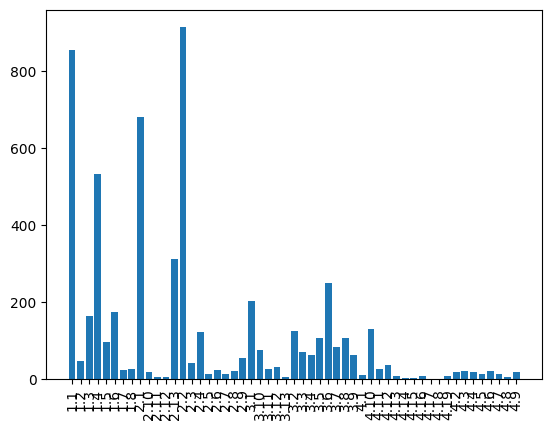

In [79]:
import matplotlib.pyplot as plt

# it is an imbalanced dataset
plt.xticks(rotation=90)
plt.bar(ordered_distribution_dict.keys(), ordered_distribution_dict.values())
plt.show()


In [80]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(list(ordered_distribution_dict.items()), columns=['key', 'value'])

# Write the DataFrame to an Excel file
df.to_excel('enrontext_distribution.xlsx', index=False)

In [86]:
new_df

,Message-ID,content,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,Label
379,<9831685.1075855725804.JavaMail.evans@thyme>,I also need to know the base salaries of Jay R...,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/1/8
381,<21041312.1075855725847.JavaMail.evans@thyme>,Thanks for the information. It would be helpfu...,1.0,3.0,2.0,4.0,10.0,2.0,4.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/3@4/10@4/11
2139,<5907100.1075858639941.JavaMail.evans@thyme>,"-----Original Message----- From: Hawkins, Bern...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
2140,<26625142.1075858639964.JavaMail.evans@thyme>,"-----Original Message----- From: Perrino, Dave...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
2232,<19730598.1075858642129.JavaMail.evans@thyme>,"-----Original Message----- From: Comnes, Alan ...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499650,<18361957.1075861368310.JavaMail.evans@thyme>,There is a lot of confidential information her...,1.0,1.0,2.0,2.0,13.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/13@1/1/2
501042,<29049822.1075842045435.JavaMail.evans@thyme>,You may have seen this when it first came out ...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/1@2/4@1/1/6
507376,<205897.1075861997314.JavaMail.evans@thyme>,"Mark, Can you email me or fax me any written d...",1.0,5.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/5@2/2
509660,<23743848.1075863311776.JavaMail.evans@thyme>,"To:WILLIAMS, WILLIAM Email:bwillia5@enron.com ...",1.0,1.0,1.0,2.0,9.0,1.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/9@1/1/7


In [14]:
# the number of labels parsed above matches the one in enron arff files
h_labels = "1,1/1,1/1/1,1/1/2,1/1/3,1/1/4,1/1/5,1/1/6,1/1/7,1/1/8,1/1/9,1/1/10,1/1/11,1/1/12,1/1/13,1/2,1/3,1/4,1/5,1/6,1/7,1/8,2,2/1,2/2,2/3,2/4,2/5,2/6,2/7,2/8,2/9,2/10,2/11,2/12,2/13,4,4/1,4/2,4/3,4/4,4/5,4/6,4/7,4/8,4/9,4/10,4/11,4/12,4/13,4/14,4/15,4/16,4/17,4/18,4/19"
labels_list = h_labels.split(',')
len(labels_list)

56

In [88]:
new_df

,Message-ID,content,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,Label
379,<9831685.1075855725804.JavaMail.evans@thyme>,I also need to know the base salaries of Jay R...,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/1/8
381,<21041312.1075855725847.JavaMail.evans@thyme>,Thanks for the information. It would be helpfu...,1.0,3.0,2.0,4.0,10.0,2.0,4.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/3@4/10@4/11
2139,<5907100.1075858639941.JavaMail.evans@thyme>,"-----Original Message----- From: Hawkins, Bern...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
2140,<26625142.1075858639964.JavaMail.evans@thyme>,"-----Original Message----- From: Perrino, Dave...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
2232,<19730598.1075858642129.JavaMail.evans@thyme>,"-----Original Message----- From: Comnes, Alan ...",1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4@2/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499650,<18361957.1075861368310.JavaMail.evans@thyme>,There is a lot of confidential information her...,1.0,1.0,2.0,2.0,13.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/13@1/1/2
501042,<29049822.1075842045435.JavaMail.evans@thyme>,You may have seen this when it first came out ...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/1@2/4@1/1/6
507376,<205897.1075861997314.JavaMail.evans@thyme>,"Mark, Can you email me or fax me any written d...",1.0,5.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/5@2/2
509660,<23743848.1075863311776.JavaMail.evans@thyme>,"To:WILLIAMS, WILLIAM Email:bwillia5@enron.com ...",1.0,1.0,1.0,2.0,9.0,1.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/9@1/1/7


In [92]:
# randomly remove 1/1 label for 825 rows that contain it

filtered_new_df = new_df[new_df['Label'].str.contains('1/1')]
len(filtered_new_df)
filtered_new_df
    





,Message-ID,content,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,Label
379,<9831685.1075855725804.JavaMail.evans@thyme>,I also need to know the base salaries of Jay R...,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/1/8
3922,<860767.1075849626951.JavaMail.evans@thyme>,This is an excellent update. Thanks for puttin...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/1@2/2@1/1/9
3928,<17578964.1075849627055.JavaMail.evans@thyme>,Good plan. I agree re SJ. She is on the ball. ...,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,9.0,1.0,4.0,5.0,1.0,4.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/3@2/1@2/2@1/1/9@4/5@4/10
4723,<24049587.1075849626031.JavaMail.evans@thyme>,Matt: As GSS Business Development transitions ...,1.0,1.0,2.0,3.0,2.0,2.0,3.0,12.0,2.0,4.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/1/2@1/1/12@4/10
8769,<12708474.1075863592189.JavaMail.evans@thyme>,Market Participants: As part of the Congestion...,1.0,1.0,2.0,2.0,13.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/13@1/1/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499551,<17191225.1075852348672.JavaMail.evans@thyme>,H o o v e r I n s t i t u t i o n News Advisor...,1.0,1.0,2.0,1.0,4.0,1.0,3.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@1/4@1/1/6
499579,<9573297.1075852349319.JavaMail.evans@thyme>,"Greg, I am forwarding you a message from Frank...",1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,5.0,1.0,3.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/1@2/2@1/1/4@1/1/5@1/1/9
499650,<18361957.1075861368310.JavaMail.evans@thyme>,There is a lot of confidential information her...,1.0,1.0,2.0,2.0,13.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/13@1/1/2
501042,<29049822.1075842045435.JavaMail.evans@thyme>,You may have seen this when it first came out ...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1/1@2/1@2/4@1/1/6


In [58]:
## Conclusions -- all 1702 labeled samples has Cat_1_level_1 == 1.0
new_df_1 = new_df.filter(regex=r'Cat_1_level_1|Cat_1_level_2|Message-ID|content|labeled')

# Count all rows where content is NaN
na_new_df = new_df_1[pd.isna(new_df_1['content'])]
print("Content is NaN Count:", new_df_1['content'].isna().sum().sum())

# Count all rows where Cat_1_level_2 is NaN
count = len(new_df_1[pd.isna(new_df_1['Cat_1_level_2'])])
print("Cat_1_level_2 is NaN Count:", count)

# Count all the rows where Cat_1_level_1 is not equal to 1.0
count = len(df[df['Cat_1_level_1'] != 1.0])
print("Cat_1_level_1 is not equal to 1.0 Count:", count)

na_new_df
# new_df_1

Content is NaN Count: 5
Cat_1_level_2 is NaN Count: 0
Cat_1_level_1 is not equal to 1.0 Count: 0


,Message-ID,content,Cat_1_level_1,Cat_1_level_2,labeled
221969,<1054751.1075863429466.JavaMail.evans@thyme>,NaN,1.0,3.0,True
221972,<15202668.1075863429511.JavaMail.evans@thyme>,NaN,1.0,3.0,True
221976,<30128927.1075863429600.JavaMail.evans@thyme>,NaN,1.0,1.0,True
221979,<5644939.1075863429705.JavaMail.evans@thyme>,NaN,1.0,3.0,True
222171,<9865211.1075863435418.JavaMail.evans@thyme>,NaN,1.0,7.0,True
